In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from moltraffic.visualisations import *

In [2]:
predictions_file = f'../models/test_predictions/PytorchEnsembleRegressorModel/subset_1_1_2016_run_1.csv'
df = pd.read_csv(predictions_file)
df['Time'] = pd.to_datetime(df['Time'])

In [3]:
columns_pred = [x.replace('_pred', '') for x in df.columns if x.endswith('_pred')]
columns_actual = [x.replace('_actual', '') for x in df.columns if x.endswith('_actual')]

# TODO some of the _actual columns are not included 
columns = sorted(list(set(columns_pred).intersection(set(columns_actual))))
diff_columns = []
for c in columns:
    df[f'{c}_diff'] = df[f'{c}_pred']-df[f'{c}_actual']
    diff_columns.append(f'{c}_diff')
df_diff = df[['Time'] + [x for x in df.columns if x.endswith('_diff')]]

In [15]:
station_error_boxplot(df_diff[diff_columns], 'station_error_dist.pdf')
#plt.savefig('station_error_dist.pdf', bbox_inches='tight', pad_inches=0)

<Figure size 1080x3816 with 0 Axes>

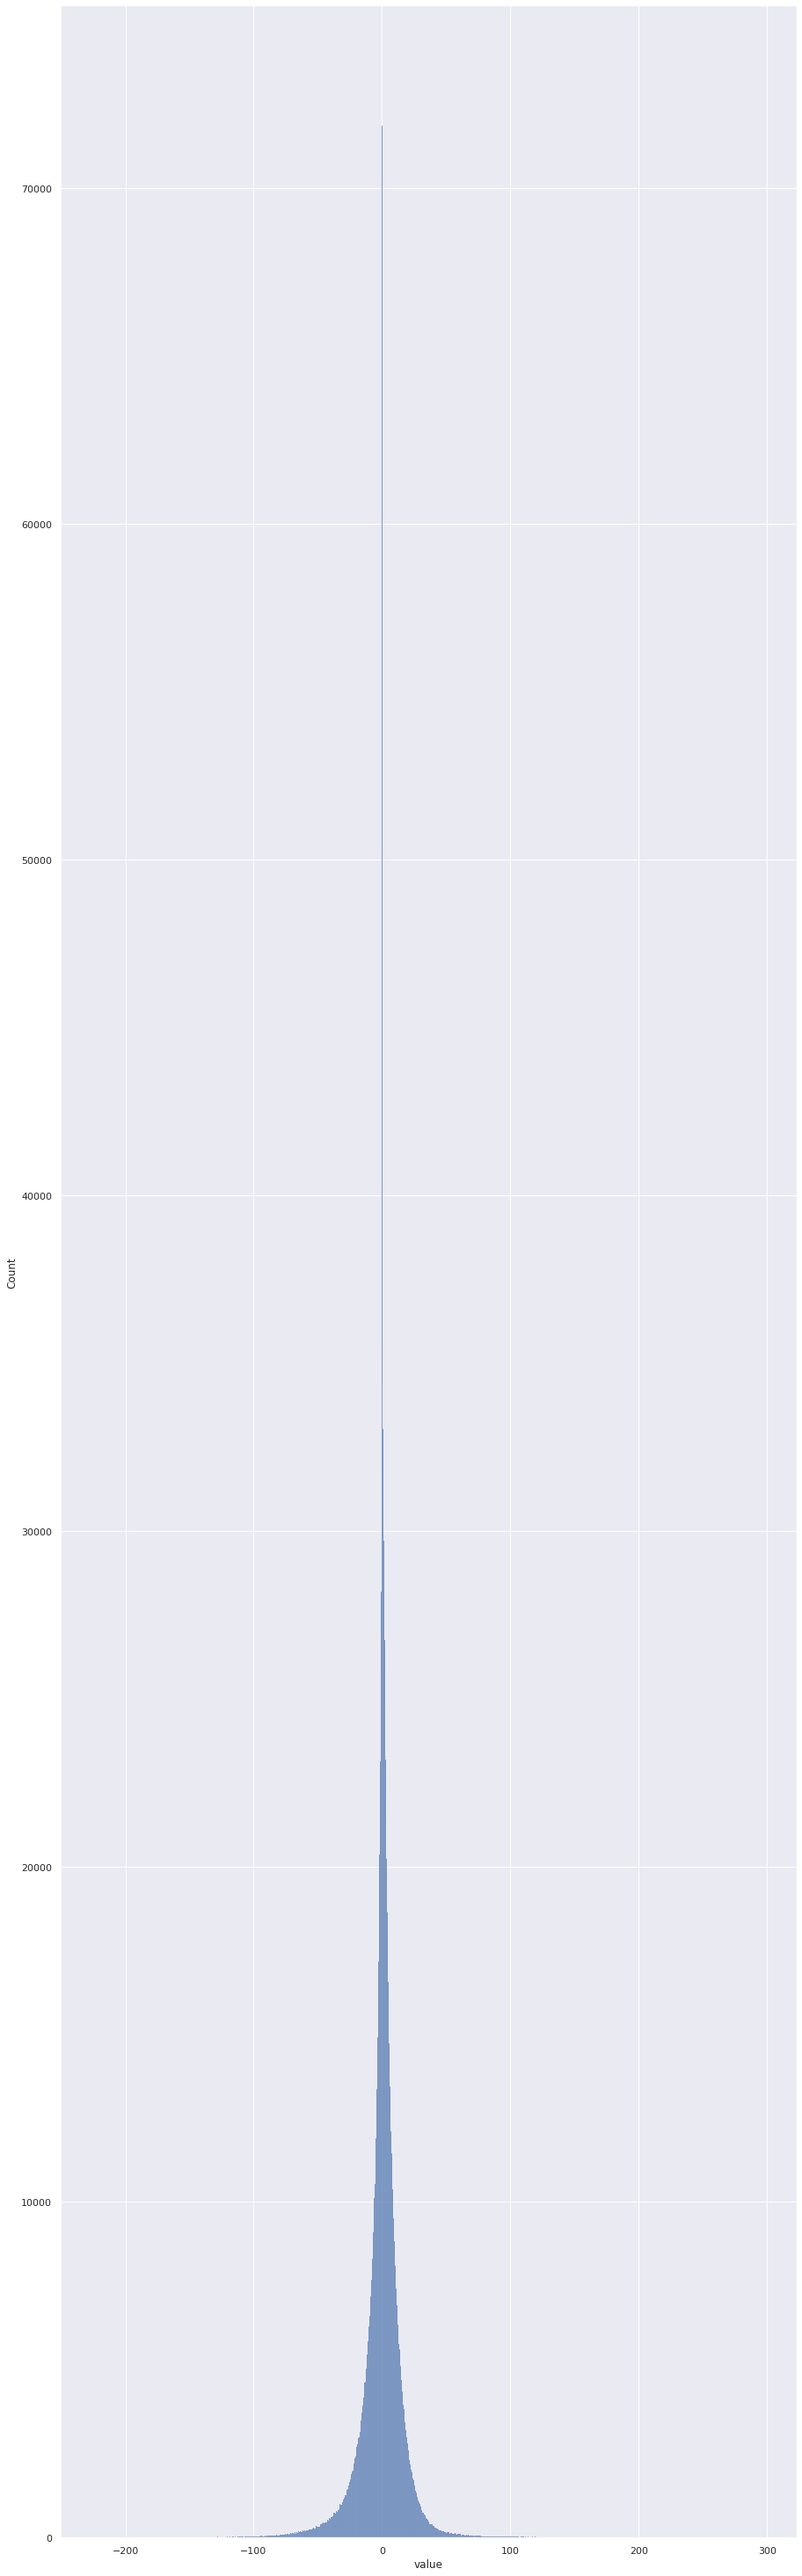

<Figure size 1080x3816 with 0 Axes>

In [5]:
error_distribution(df_diff[diff_columns])

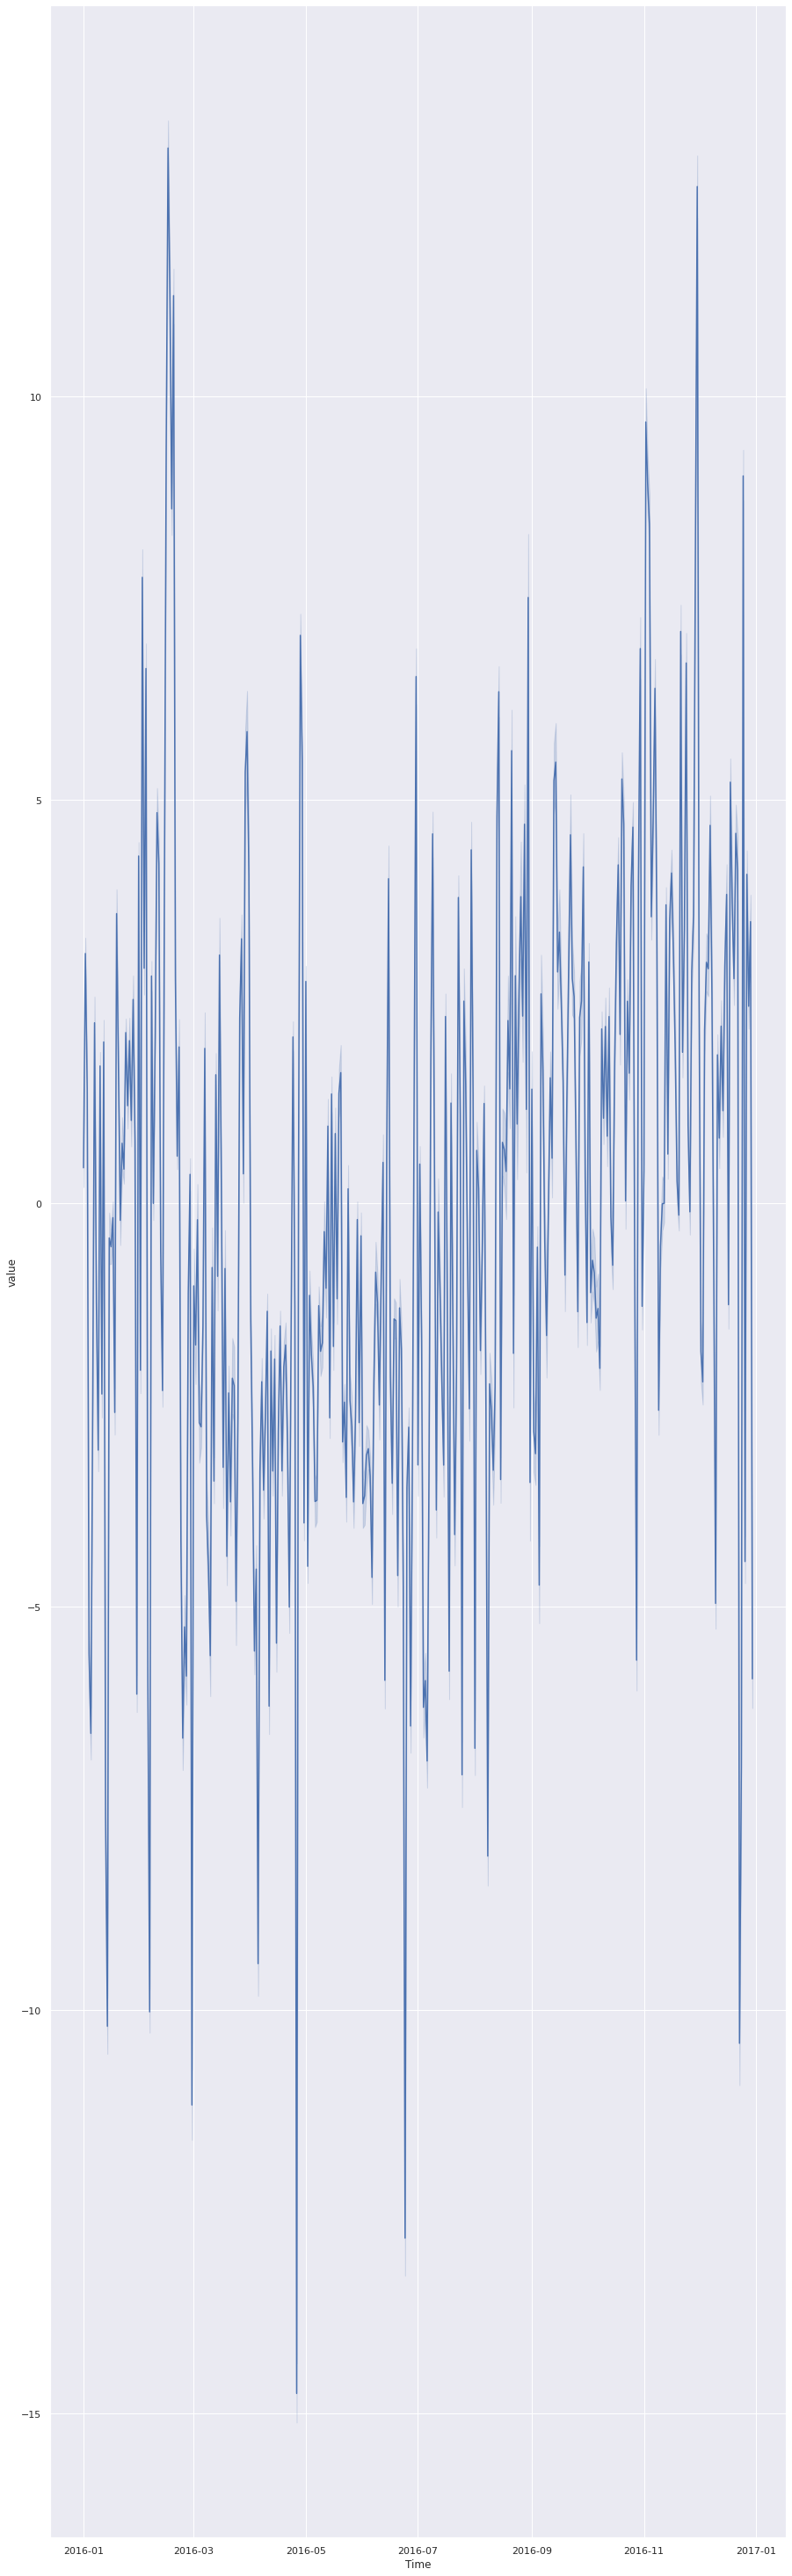

<Figure size 1080x3816 with 0 Axes>

In [6]:
mean_error_over_time(df_diff, diff_columns)

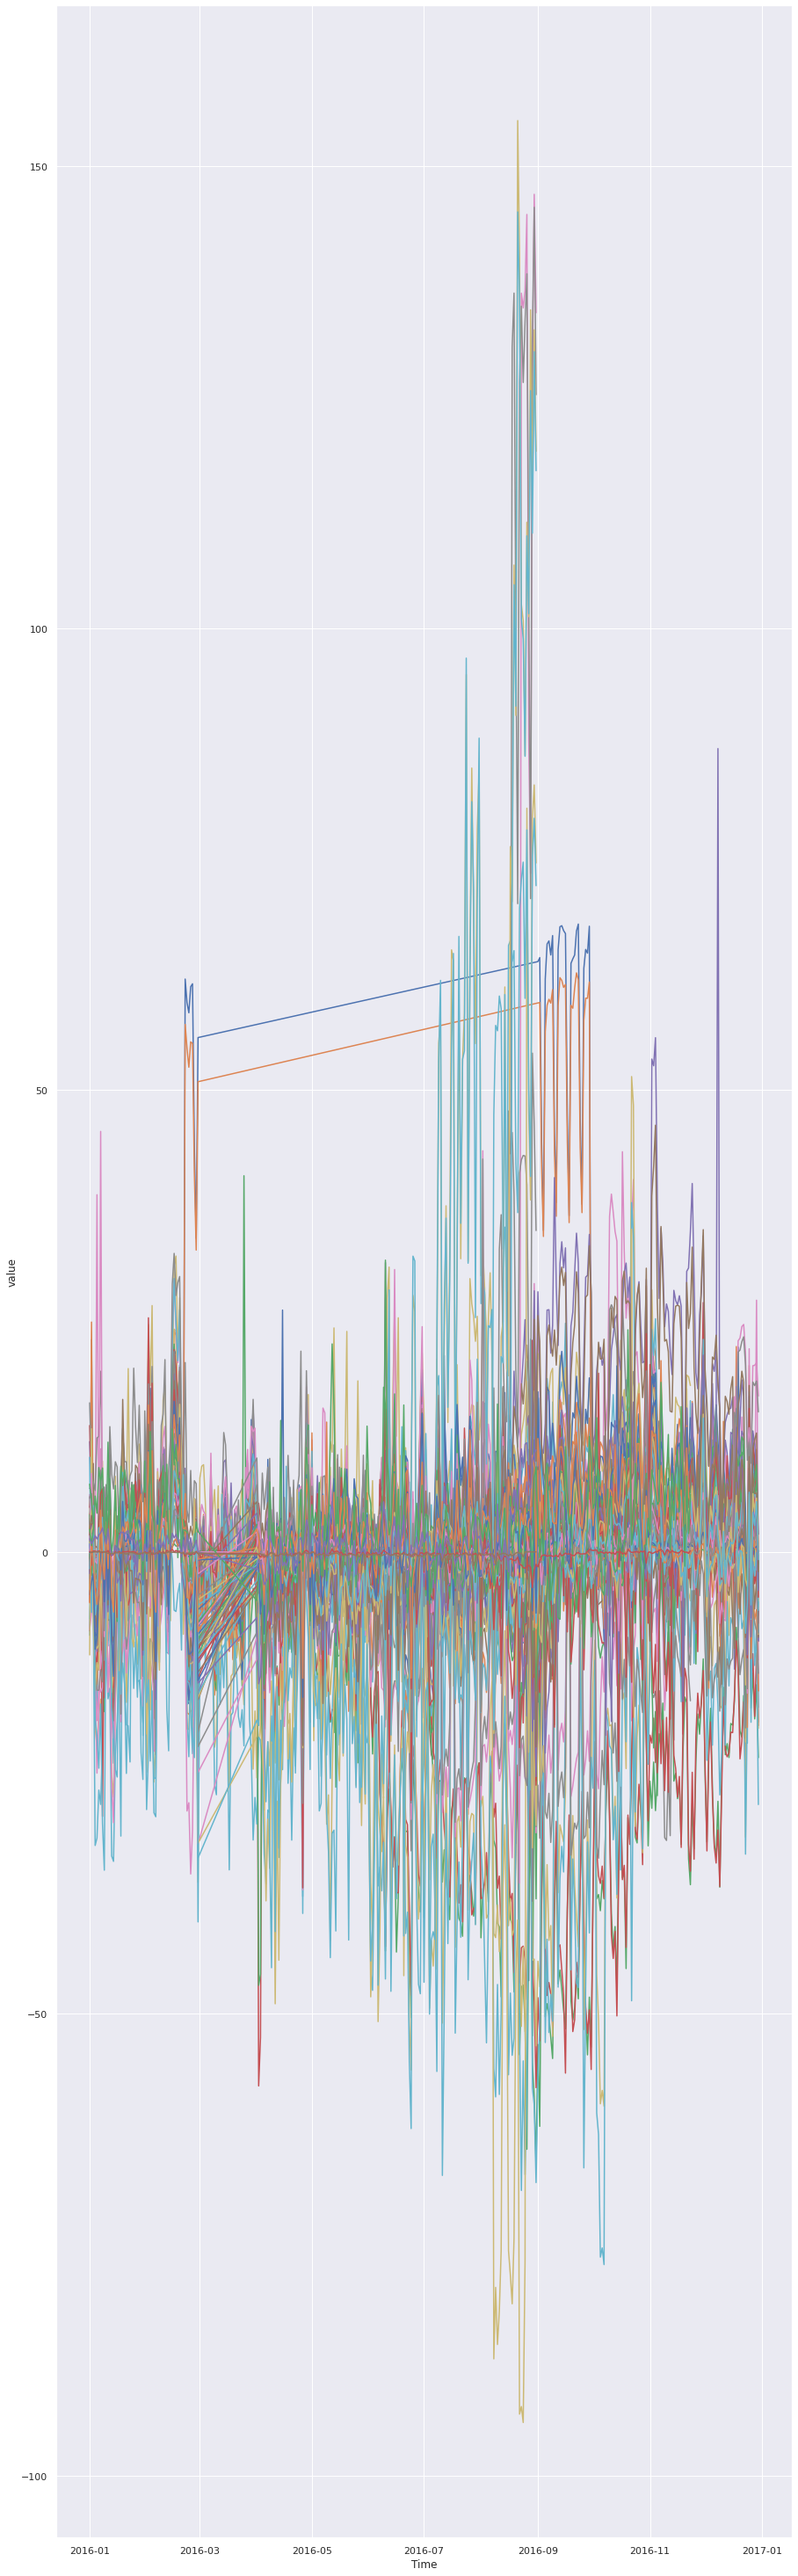

<Figure size 1080x3816 with 0 Axes>

In [7]:
all_errors_over_time(df_diff, diff_columns)

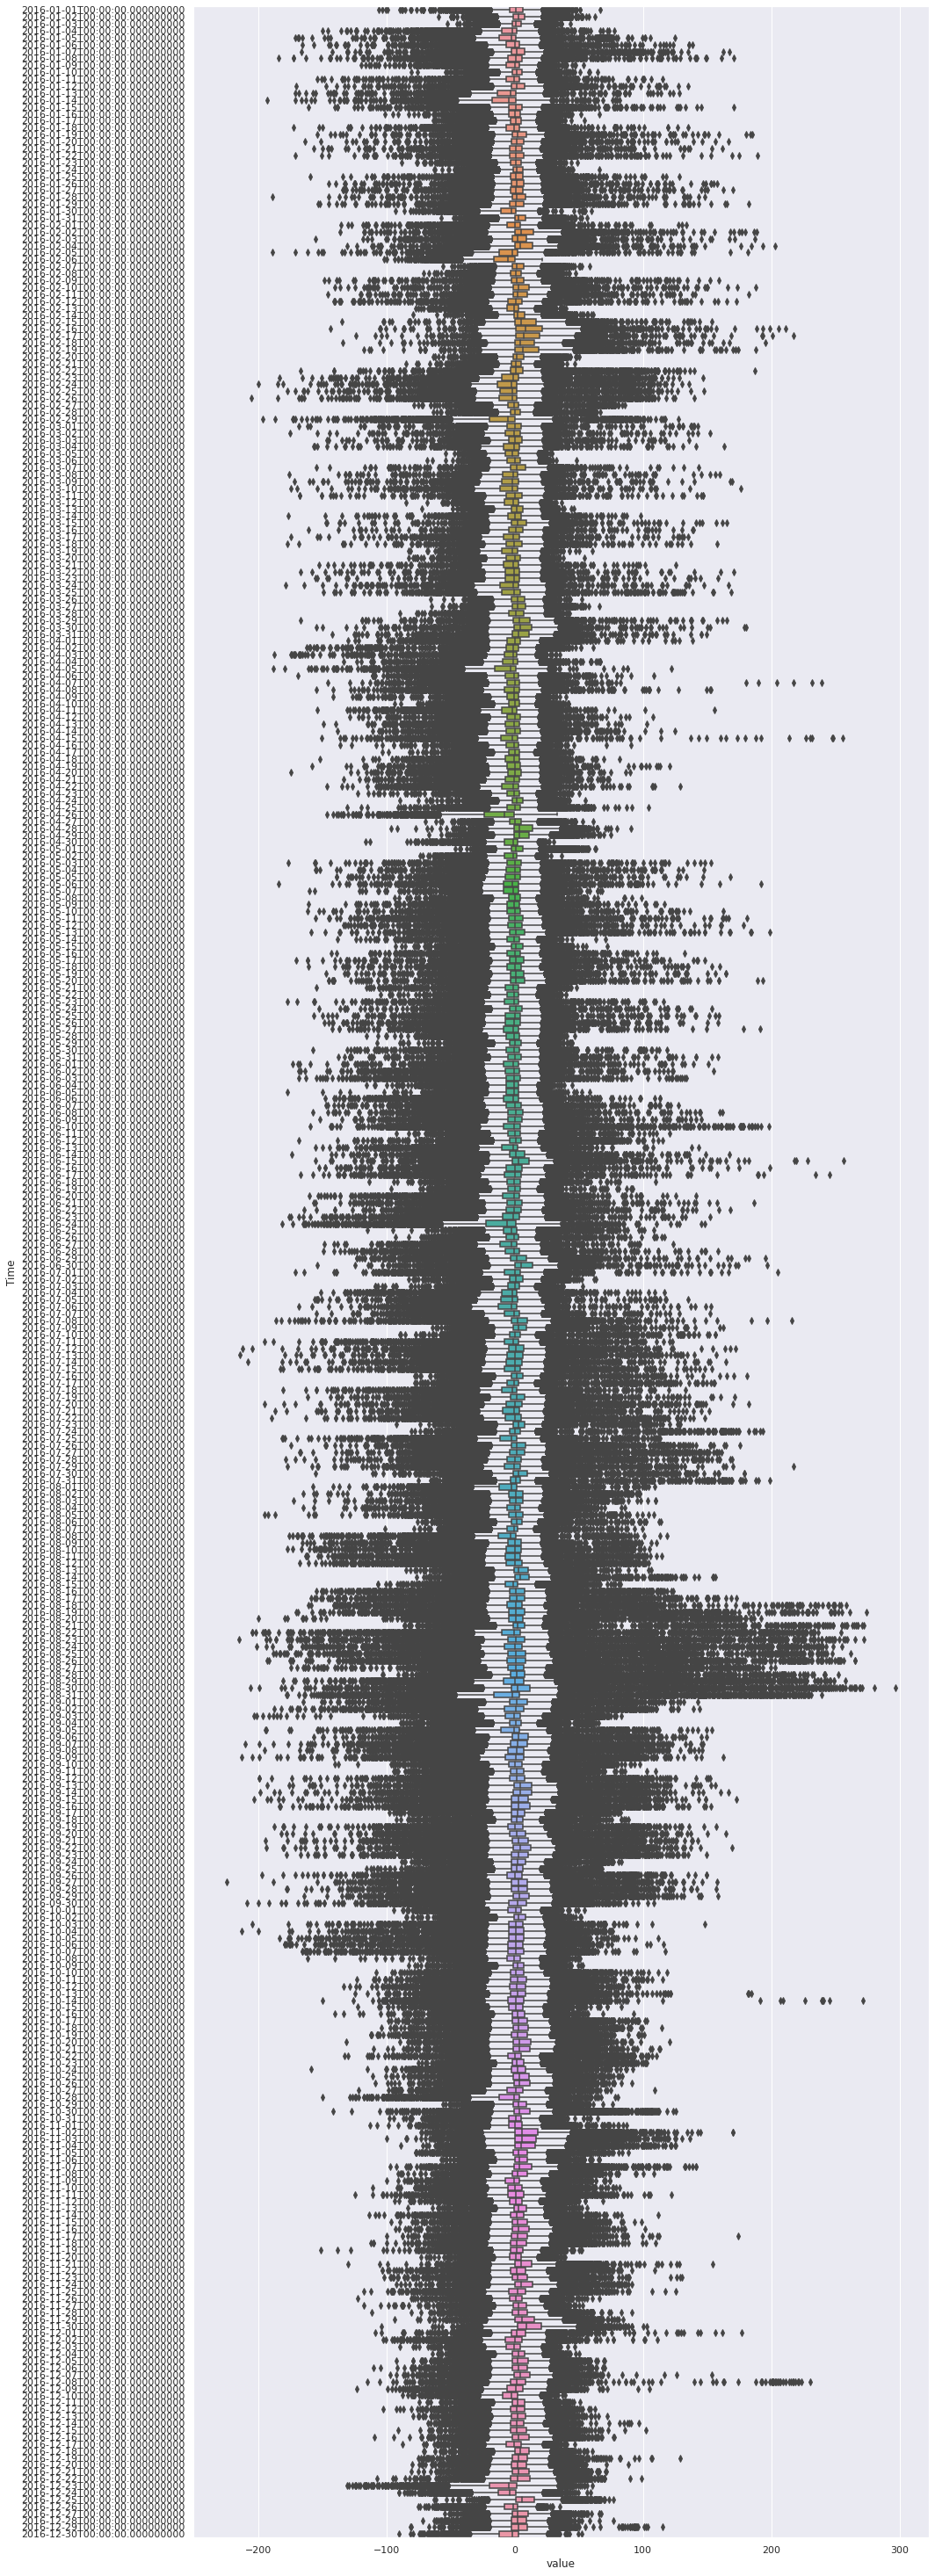

<Figure size 1080x5256 with 0 Axes>

In [8]:
error_distribution_over_time(df_diff, diff_columns)

<AxesSubplot:xlabel='Time', ylabel='value'>

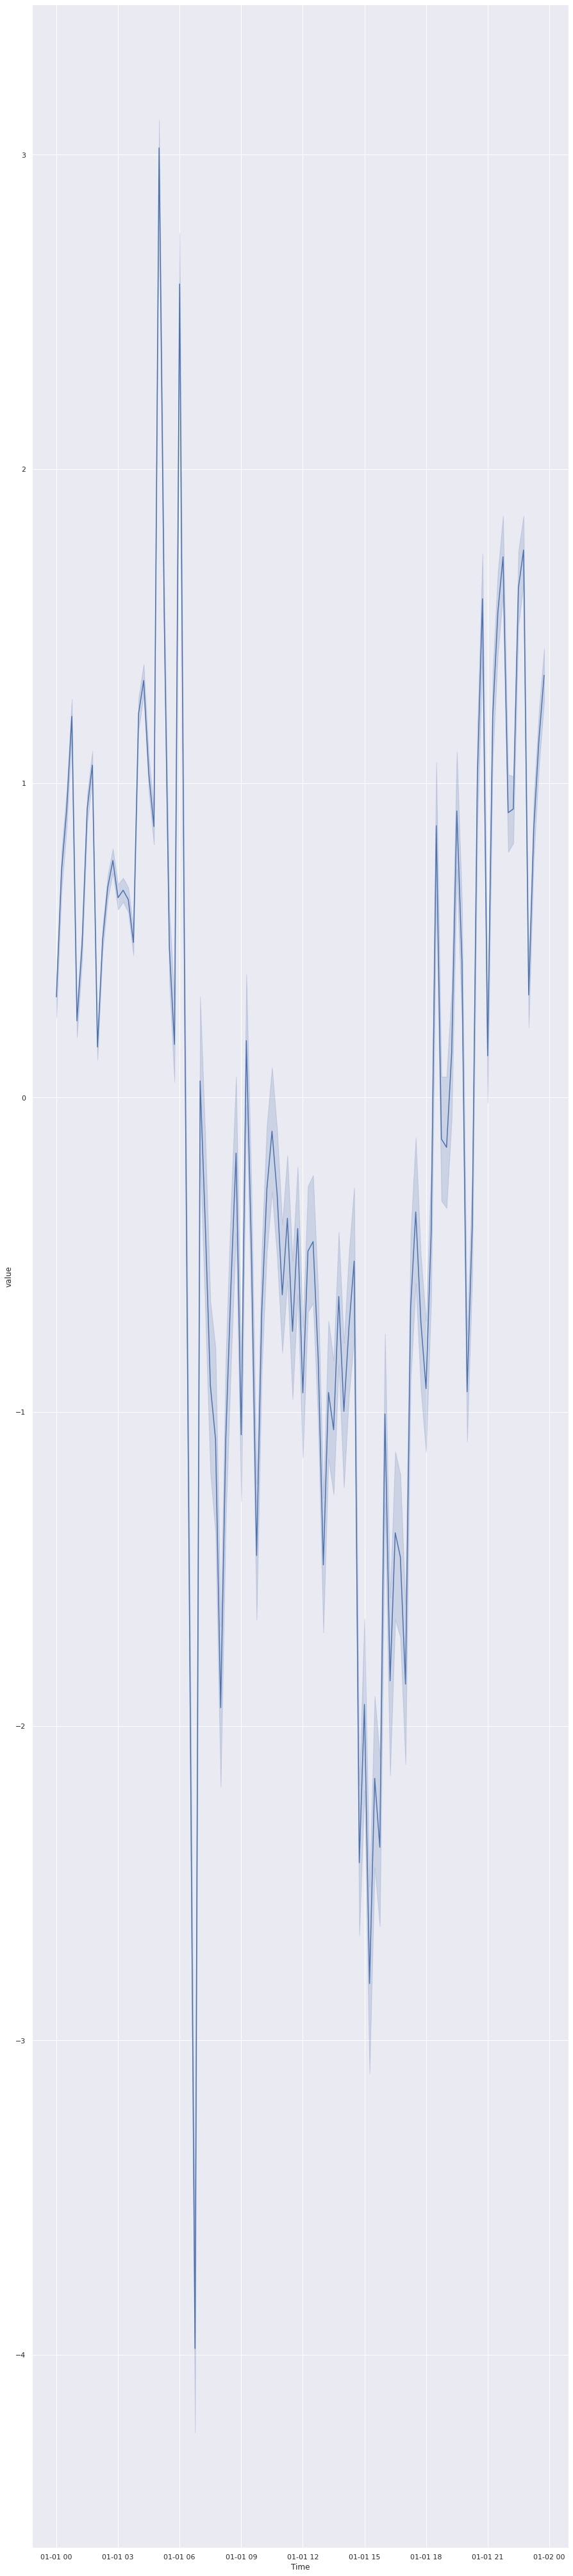

In [9]:
d = df_diff.melt(id_vars =['Time'], value_vars = diff_columns).dropna()
d['Year'] = d['Time'].dt.hour
d['Day'] = d['Time'].dt.minute
d['Time'] = pd.to_datetime(d['Day'].apply(str) + '/' + d['Year'].apply(str), format='%M/%H')
sns.lineplot(x='Time', y='value', data=d)

<AxesSubplot:xlabel='value', ylabel='Day'>

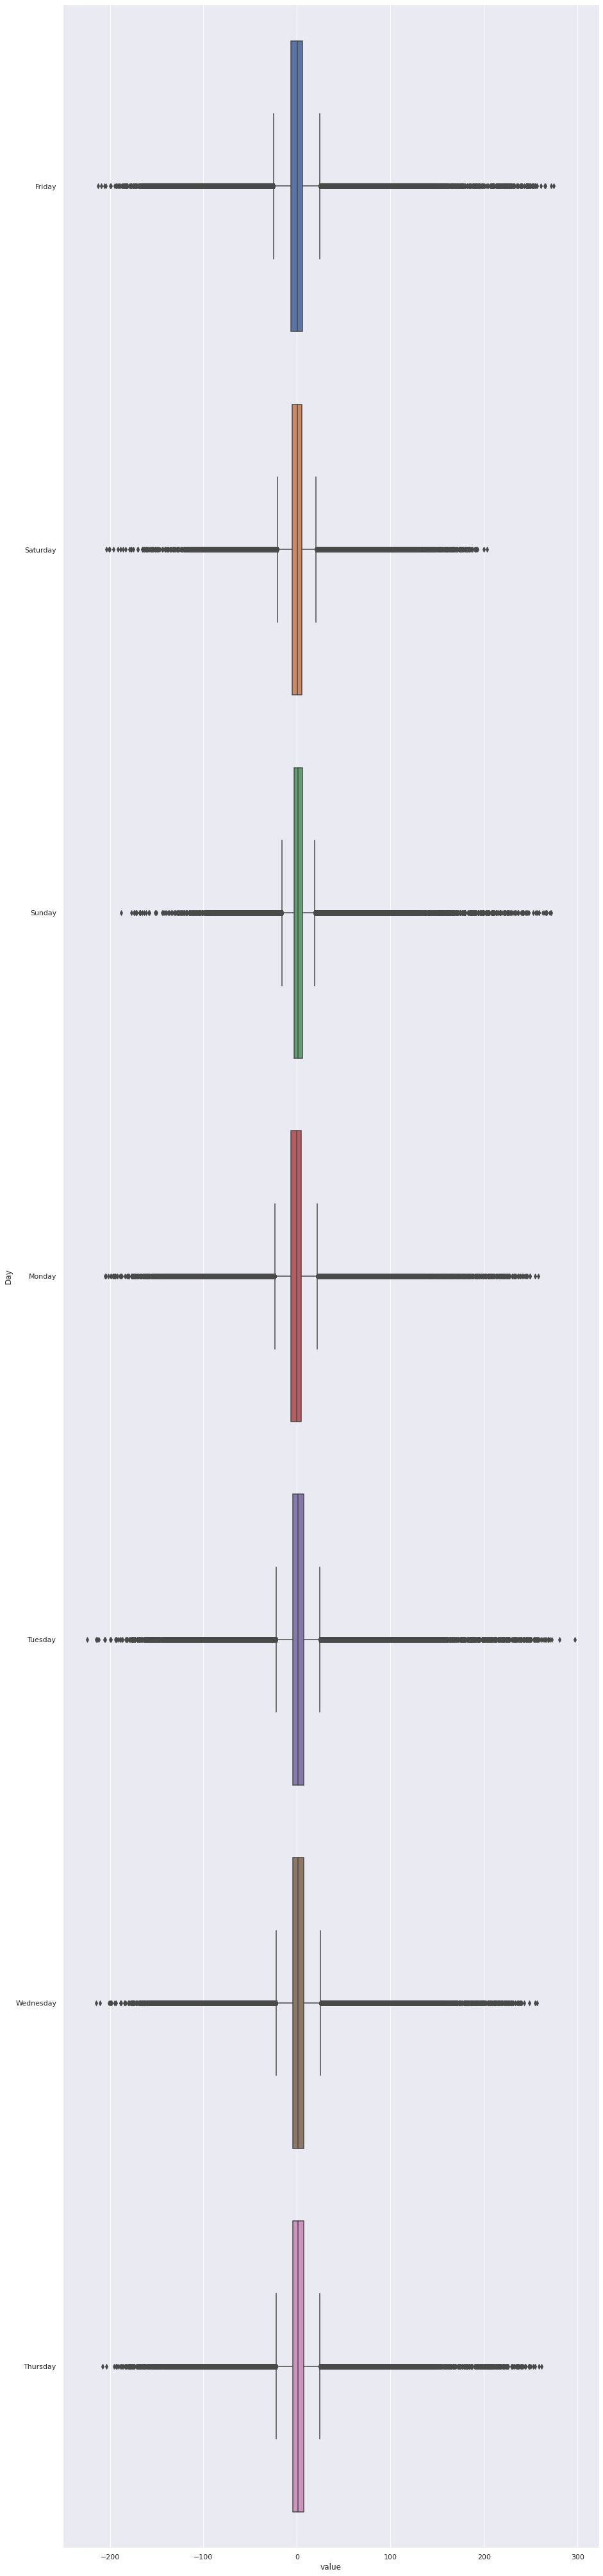

In [10]:
d = df_diff.melt(id_vars =['Time'], value_vars = diff_columns).dropna()
d['Day'] = d['Time'].dt.day_name()
sns.boxplot(y='Day', x='value', data=d)

In [11]:
columns = sorted(list(set(columns_pred).intersection(set(columns_actual))))
#diff_columns = []
diff_data = []
for c in columns:
    diff = list(abs(df[f'{c}_pred']-df[f'{c}_actual']))
    pred = list(df[f'{c}_pred'])
    actual = list(df[f'{c}_actual'])
    times = list(df['Time'])
    diff_data.extend(zip(diff, pred, actual, times, [c]*len(times)))
for e, p, a, t, r in sorted(diff_data, reverse = True)[:30]:
    print(f'error: {str(e).ljust(18)} predicted: {str(p).ljust(18)} actual: {str(a).ljust(18)} time: {t}, road: {r}')

error: 271.62274          predicted: 272.62274          actual: 1.0                time: 2016-10-14 15:30:00, road: SUM(1022-176:Prehitevalni pas: Tbilisijska > AC prikljucek)
error: 255.45645          predicted: 255.45645          actual: 0.0                time: 2016-04-15 15:30:00, road: SUM(1022-176:Prehitevalni pas: Tbilisijska > AC prikljucek)
error: 248.05814          predicted: 248.05814          actual: 0.0                time: 2016-04-15 15:15:00, road: SUM(1022-176:Prehitevalni pas: Tbilisijska > AC prikljucek)
error: 247.24176          predicted: 247.24176          actual: 0.0                time: 2016-04-15 16:15:00, road: SUM(1022-176:Prehitevalni pas: Tbilisijska > AC prikljucek)
error: 245.43970000000002 predicted: 365.4397           actual: 120.0              time: 2016-06-17 15:15:00, road: SUM(1005-23a:Smer 1: Cesta dveh cesarjev > AC priključek)
error: 245.18655          predicted: 245.18655          actual: 0.0                time: 2016-10-14 16:15:00, road: SUM(10

In [12]:
def actual_vs_predicted_distribution(hour, minute, station):
    v1 = [a for (e, p, a, t, r) in diff_data if r == station and t.hour==hour and t.minute==minute]
    v2 = [p for (e, p, a, t, r) in diff_data if r == station and t.hour==hour and t.minute==minute]
    min_v = min(min(v1), min(v2))
    max_v = max(max(v1), max(v2))
    plt.hist(v1, int(max_v-min_v), range=(min_v, max_v), alpha=0.5, label='actual')
    plt.hist(v2, int(max_v-min_v), range=(min_v, max_v), alpha=0.5, label='predicted')
    plt.legend()
    plt.show()
    
#actual_vs_predicted_distribution(5, 45, '1006-22a:Smer 1: AC priključek > Ulica bratov Komel')
#actual_vs_predicted_distribution(7, 30, '1006-22a:Smer 1: AC priključek > Ulica bratov Komel')

hours_selector = widgets.IntSlider(min=0, max=23, step=1, value=5)
minutes_selector = widgets.IntSlider(min=0, max=45, step=15, value=45)
interact(actual_vs_predicted_distribution, hour=hours_selector, minute=minutes_selector, station=sorted(list(set([x[4] for x in diff_data]))));

interactive(children=(IntSlider(value=5, description='hour', max=23), IntSlider(value=45, description='minute'…

In [13]:
def actual_vs_predicted_series_inter(hour, minute, station):
    actual_vs_predicted_series(diff_data, hour, minute, station, output_dir=None, output_file=None)

hours_selector = widgets.IntSlider(min=0, max=23, step=1, value=5)
minutes_selector = widgets.IntSlider(min=0, max=45, step=15, value=45)
interact(actual_vs_predicted_series_inter, hour=hours_selector, minute=minutes_selector, station=sorted(list(set([x[4] for x in diff_data]))));
    
#actual_vs_predicted_series(7, 30, '1006-22a:Smer 1: AC priključek > Ulica bratov Komel')
#actual_vs_predicted_series(5, 45, '1006-22a:Smer 1: AC priključek > Ulica bratov Komel')

interactive(children=(IntSlider(value=5, description='hour', max=23), IntSlider(value=45, description='minute'…